In [1]:
import time
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
import numpy as np
from numpy import sort

# XGBoost

In [2]:
def xgboost(X_train, y_train, X_test, y_test):
    last_time = time.time()
    xgb = XGBClassifier(n_estimators=300, objective='multi:softmax', num_class=13, random_state=0)

    xgb.fit(X_train, y_train)
    middle_time = time.time()

    y_pred = xgb.predict(X_test)

    current_time = time.time()

    accuracy_score(y_test, y_pred)

    print("训练耗时： {}".format(middle_time - last_time))
    print("测试耗时： {}".format(current_time - middle_time))
    cm = confusion_matrix(y_test, y_pred)
    print('confusion matrix xgb:')
    print(cm)
    print('classification report xgb:')
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(cm, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                          normalize=True, title='Normalized confusion matrix')

    plt.show()

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")
        # color="red" if cm[i, j] > thresh else "black")
    # plt.set_tight_layout(True)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plot_confusion_matrix(cm, classes=['0', '1', '2'], normalize=True, title='Normalized confusion matrix')
    plt.show()

# Combine all csv data

In [116]:
    # 显示所有列
    pd.set_option('display.max_columns', None)
    # 显示所有行
    pd.set_option('display.max_rows', None)
    # 设置value的显示长度为100，默认为50
    pd.set_option('max_colwidth', 100)

    # 读取csv
    # path = r'/home/itu/datadisk/dataset/csv-for-learning/'
    path = r'/Users/xiafei/Downloads/itu-dataset/csv-for-learning/'
    test_path = r'/Users/xiafei/Downloads/itu-dataset/csv-for-evaluation/'
    
    # all_n_files = glob.glob(path + "/*.n.csv")
    # all_v_files = glob.glob(path + "/*.v.csv")
    # all_p_files = glob.glob(path + "/*.p.csv")
    train_n_files = [path + x for x in
                   ['20200629.n.csv', '20200630.n.csv', '20200701.n.csv', '20200702.n.csv', '20200703.n.csv',
                    '20200704.n.csv', '20200705.n.csv', '20200706.n.csv']]
    train_v_files = [path + x for x in
                   ['20200629.v.csv', '20200630.v.csv', '20200701.v.csv', '20200702.v.csv', '20200703.v.csv',
                    '20200704.v.csv', '20200705.v.csv', '20200706.v.csv']]
    train_p_files = [path + x for x in
                   ['20200629.p.csv', '20200630.p.csv', '20200701.p.csv', '20200702.p.csv', '20200703.p.csv',
                    '20200704.p.csv', '20200705.p.csv', '20200706.p.csv']]
    
    
    test_n_files = [test_path + x for x in
                    ['20200707.n.csv', '20200708.n.csv', '20200709.n.csv', '20200710.n.csv', 
                     '20200711.n.csv', '20200712.n.csv', '20200713.n.csv']]
    test_v_files = [test_path + x for x in
                    ['20200707.v.csv', '20200708.v.csv', '20200709.v.csv', '20200710.v.csv',
                     '20200711.v.csv', '20200712.v.csv', '20200713.v.csv']]
    test_p_files = [test_path + x for x in
                    ['20200707.p.csv', '20200708.p.csv', '20200709.p.csv', '20200710.p.csv',
                     '20200711.p.csv', '20200712.p.csv', '20200713.p.csv']]
    

    li_n = []
    li_v = []
    li_p = []
    
    li_test_n = []
    li_test_v = []
    li_test_p = []

    # train
    for filename in train_n_files:
        print('read_csv network:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_n.append(df)

    for filename in train_v_files:
        print('read_csv virtual:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_v.append(df)

    for filename in train_p_files:
        print('read_csv physical:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_p.append(df)
        
    # test
    for filename in test_n_files:
        print('read csv-for-evaluation network:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_test_n.append(df)
    
    for filename in test_v_files:
        print('read csv-for-evaluation virtual:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_test_v.append(df)
        
    for filename in test_p_files:
        print('read csv-for-evaluation physical:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_test_p.append(df)

    dataset_n = pd.concat(li_n, axis=0, ignore_index=True, sort=False)
    dataset_v = pd.concat(li_v, axis=0, ignore_index=True, sort=False)
    dataset_p = pd.concat(li_p, axis=0, ignore_index=True, sort=False)
    
    test_n = pd.concat(li_test_n, axis=0, ignore_index=True, sort=False)
    test_v = pd.concat(li_test_v, axis=0, ignore_index=True, sort=False)
    test_p = pd.concat(li_test_p, axis=0, ignore_index=True, sort=False)

    print('dataset_n_v_p:')
    print(dataset_n.shape)
    print(dataset_v.shape)
    print(dataset_p.shape)
    print('testset_n_v_p:')
    print(test_n.shape)
    print(test_v.shape)
    print(test_p.shape)

    dataset_p.drop(['type', 'type_code'], axis=1, inplace=True)
    dataset_n.drop(['type', 'type_code'], axis=1, inplace=True)

    test_p.drop(['type', 'type_code'], axis=1, inplace=True)
    test_n.drop(['type', 'type_code'], axis=1, inplace=True)

    dataset_n.rename(columns=lambda x: 'n_' + x, inplace=True)
    dataset_v.rename(columns=lambda x: 'v_' + x, inplace=True)
    dataset_v['common_time_index'] = dataset_v['v_/time']
    dataset_p.rename(columns=lambda x: 'p_' + x, inplace=True)
    dataset_p['common_time_index'] = dataset_p['p_/time']

    test_n.rename(columns=lambda x: 'n_' + x, inplace=True)
    test_v.rename(columns=lambda x: 'v_' + x, inplace=True)
    test_v['common_time_index'] = test_v['v_/time']
    test_p.rename(columns=lambda x: 'p_' + x, inplace=True)
    test_p['common_time_index'] = test_p['p_/time']

    # dataset = pd.concat([dataset_n, dataset_v, dataset_p], axis=1, sort=False)
    dataset_pn = pd.merge(dataset_p, dataset_n, how='inner', left_index=True, right_index=True)
    dataset = pd.merge(dataset_pn, dataset_v, how='inner', on=['common_time_index'])

    # testset = pd.concat([test_n, test_v, test_p], axis=1, sort=False)
    testset_pn = pd.merge(test_p, test_n, how='inner', left_index=True, right_index=True)
    testset = pd.merge(testset_pn, test_v, how='inner', on=['common_time_index'])

    
    dataset.drop(['common_time_index'], axis=1, inplace=True)
    testset.drop(['common_time_index'], axis=1, inplace=True)
    dataset.dropna(axis=0, how='any', inplace=True)
    testset.dropna(axis=0, how='any', inplace=True)

    print('dataset:')
    print(dataset.shape)
    print('testset:')
    print(testset.shape)
    # 数据集概览
    # print(dataset.describe())
    # print(dataset.head(5))

    # valid
    # print('isnan', np.isnan(dataset.any()))
    # print('isfinite', np.isfinite(dataset.all()))
    # dataset = pd.read_csv('/home/itu/datadisk/dataset/csv-for-learning/20200629.n.csv')

    # 划分训练测试
    column = dataset.columns
    X_train = dataset[column[:-2]]
    X_test = testset[column[:-2]]
    y_train = dataset[column[-1]]
    y_test = testset[column[-1]]

    # 处理bool类型和object类型
    # {'int64': 337, 'float64': 662, 'bool': 68, 'object': 1}
    # {'int64': 281, 'float64': 718, 'object': 69}
    for i in X_train.columns:
        if str(X_train[i].dtype) == 'object':
            X_train[i] = pd.to_numeric(X_train[i])
            X_train[i] = X_train[i].astype('int')
        elif str(X_train[i].dtype) == 'bool':
            X_train[i] = X_train[i].astype('int')

    for i in X_test.columns:
        if str(X_test[i].dtype) == 'object':
            X_test[i] = pd.to_numeric(X_test[i])
            X_test[i] = X_test[i].astype('int')
        elif str(X_test[i].dtype) == 'bool':
            X_test[i] = X_test[i].astype('int')

    X = pd.concat([X_train, X_test], axis=0, ignore_index=True, sort=False)
    Y = pd.concat([y_train, y_test], axis=0, ignore_index=True, sort=False)



    #     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    print(X.shape, Y.shape)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

    ss = StandardScaler()
    std_X_train = ss.fit_transform(X_train)
    std_X_test = ss.fit_transform(X_test)

read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200629.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200630.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200701.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200702.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200703.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200704.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200705.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200706.n.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200629.v.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200630.v.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200701.v.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/

# 取每一个状态的最后一分钟和第一分钟的差值

In [216]:
def get_diff_dataset(dataset, X_train):
    diff_dataset = pd.DataFrame(columns=dataset.columns)
    cur_type = 0
    start_index = 0
    end_index = 0
    
    for index, row in dataset.iterrows():
        row_type = row[-1]

        if index == dataset.shape[0]-1:
            # 最后一行
            end_index = index
            #append
#             print(start_index, end_index)
            diff_df = X_train.loc[[start_index, end_index]].diff().loc[[end_index]]
            diff_df['v_type_code'] = cur_type
            diff_dataset = diff_dataset.append(diff_df, ignore_index=True)

        elif row_type != cur_type:
            end_index = index-1
            # append
#             print(start_index, end_index)
            diff_df = X_train.loc[[start_index, end_index]].diff().loc[[end_index]]
            diff_df['v_type_code'] = cur_type
            diff_dataset = diff_dataset.append(diff_df, ignore_index=True)
            # new start
            start_index = index
            cur_type = row_type
            
    diff_dataset['v_type_code'] = pd.to_numeric(diff_dataset['v_type_code'])
    return diff_dataset

In [217]:
diff_dataset = get_diff_dataset(dataset, X_train)
# diff_dataset.head()

/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [218]:
diff_testset = get_diff_dataset(testset, X_test)
diff_testset.head()

,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/paths,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/as,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/bgp-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/input-queue,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/output-queue,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/prefixes-received,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/table-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-table-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/filter-list/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/filter-list/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/local-as,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/path/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/path/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/route-map/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/route-map/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/routing-table-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/total-memory,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/as,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/inq-depth,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/outq-depth,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/notifications,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/opens,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/route-refreshes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/updates,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/notifications,n_

In [219]:
# 去掉无用字段
diff_dataset.drop(['v_type'], axis=1, inplace=True)
diff_testset.drop(['v_type'], axis=1, inplace=True)
# 去掉时间对结果的影响
diff_dataset.drop(['p_/time'], axis=1, inplace=True)
diff_testset.drop(['p_/time'], axis=1, inplace=True)
diff_dataset.drop(['v_/time'], axis=1, inplace=True)
diff_testset.drop(['v_/time'], axis=1, inplace=True)

In [220]:
#写入csv
diff_dataset.to_csv('diff_dataset.csv')
diff_testset.to_csv('diff_testset.csv')

In [221]:
diff_column = diff_dataset.columns
diff_X_train = diff_dataset[diff_column[:-1]]
diff_X_test = diff_testset[diff_column[:-1]]
diff_y_train = diff_dataset[diff_column[-1]]
diff_y_test = diff_testset[diff_column[-1]]

diff_X = pd.concat([diff_X_train, diff_X_test], axis=0, ignore_index=True, sort=False)
diff_Y = pd.concat([diff_y_train, diff_y_test], axis=0, ignore_index=True, sort=False)

In [222]:
print(diff_X_train.shape)
print(diff_X_test.shape)
print(diff_y_train.shape)
print(diff_y_test.shape)

print(diff_X.shape)
print(diff_Y.shape)

(1861, 996)
(1681, 996)
(1861,)
(1681,)
(3542, 996)
(3542,)


In [223]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: v_type_code, dtype: int64

In [224]:
diff_Y.head()

0    0
1    1
2    2
3    1
4    2
Name: v_type_code, dtype: int64

In [225]:
diff_X.head()

,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/paths,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/as,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/bgp-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/input-queue,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/output-queue,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/prefixes-received,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/table-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-table-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/filter-list/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/filter-list/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/local-as,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/path/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/path/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/route-map/memory-usage,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/route-map/total-entries,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/routing-table-version,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/total-memory,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/as,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/inq-depth,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/outq-depth,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/notifications,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/opens,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/route-refreshes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/updates,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/notifications,n_

In [226]:
diff_y_test.head()

0    0
1    1
2    2
3    7
4    8
Name: v_type_code, dtype: int64

In [227]:
diff_y_train.head()

0    0
1    1
2    2
3    1
4    2
Name: v_type_code, dtype: int64

# generate a new csv

In [119]:
dataset.to_csv('dataset.csv')
testset.to_csv('testset.csv')

# fit model

In [228]:
model = XGBClassifier(importance_type='gain')
model.fit(diff_X, diff_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# show importance image

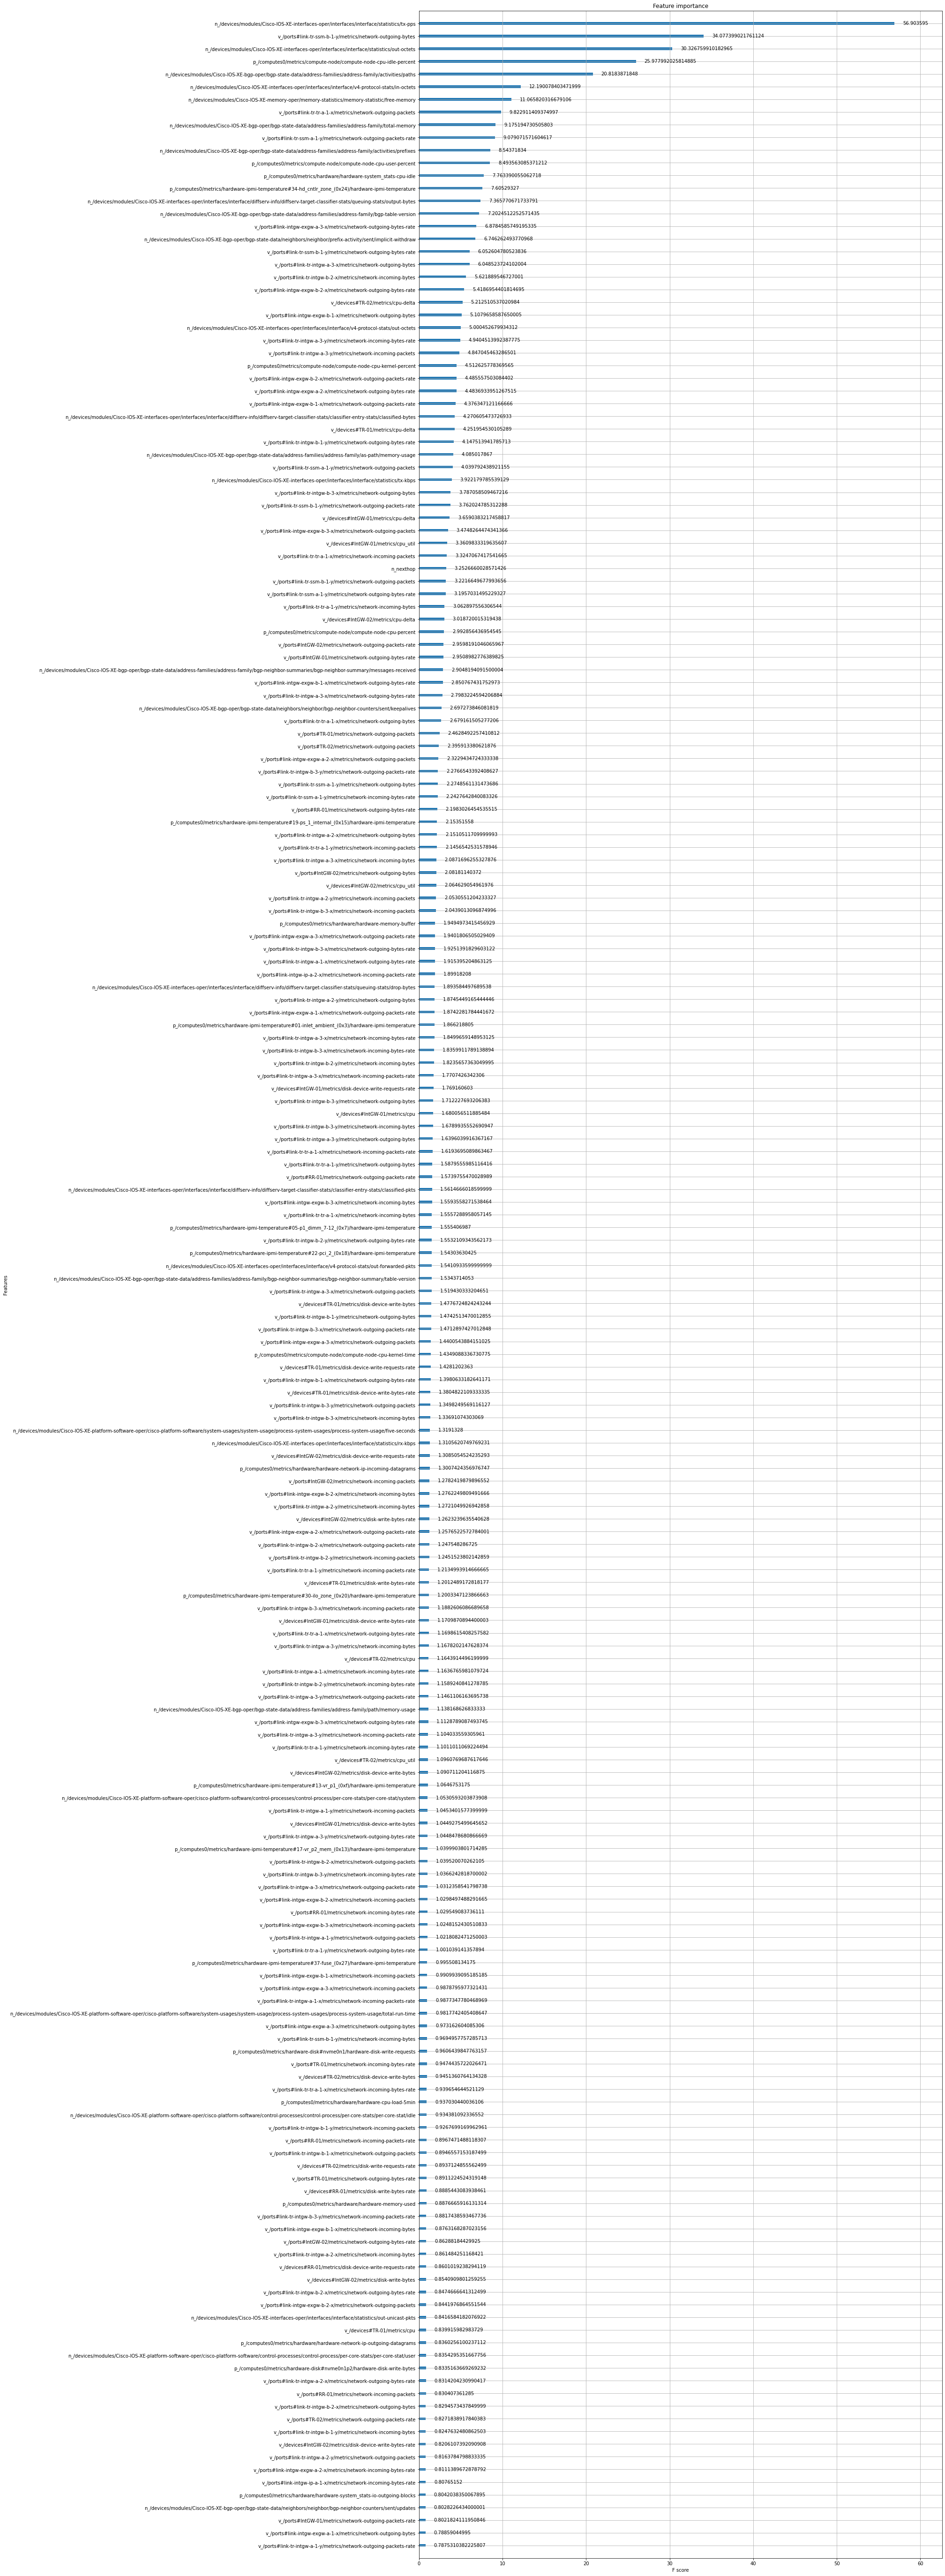

In [229]:
_, ax = plt.subplots(figsize=(20, 100))
plot_importance(model, ax=ax, max_num_features=200, importance_type='gain')
plt.show()

# write result to file

In [ ]:
  # 结果写入文件
im = pd.DataFrame({'importance': model.feature_importances_, 'var': dataset.columns[:-2]})
im = im.sort_values(by='importance', ascending=False)
im.to_csv("feature_important_data_XG.csv")

In [230]:
thresholds = sort(model.feature_importances_)[-100:]
print(thresholds)

[0.00215355 0.00216299 0.00216571 0.00217999 0.00218307 0.00218353
 0.00218862 0.00219158 0.00220914 0.00222876 0.00227285 0.00230125
 0.00235653 0.00235803 0.00240318 0.00248309 0.00248531 0.00255945
 0.00257689 0.0025965  0.00261931 0.00263055 0.002631   0.00265772
 0.00266558 0.00268833 0.00270201 0.00272312 0.0027362  0.0028687
 0.00288154 0.00289779 0.0029219  0.00292942 0.00301151 0.00301908
 0.00302254 0.0030854  0.00314781 0.00319285 0.00319537 0.00326034
 0.00336276 0.00345671 0.00376031 0.00378573 0.00392756 0.00400116
 0.00407703 0.0041417  0.00415422 0.00420059 0.00423689 0.0042989
 0.0044853  0.00452173 0.00456524 0.00466636 0.00471727 0.00487706
 0.0051356  0.00528015 0.00531529 0.00550493 0.00567001 0.00573348
 0.0058212  0.00596779 0.00599396 0.00614238 0.00629304 0.00629566
 0.00633365 0.00680302 0.00693412 0.00701833 0.00716923 0.00731596
 0.00760535 0.00789054 0.00848934 0.00849507 0.00946864 0.00965419
 0.01010892 0.01033815 0.01067433 0.01089622 0.01192105 0.011991

In [232]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(diff_X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, diff_y_train)
    # eval model
    select_X_test = selection.transform(diff_X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(diff_y_test, predictions)
    print("Thresh=%.4f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

Thresh=0.0022, n=100, Accuracy: 73.35%
Thresh=0.0022, n=99, Accuracy: 72.40%
Thresh=0.0022, n=98, Accuracy: 73.59%
Thresh=0.0022, n=97, Accuracy: 73.17%
Thresh=0.0022, n=96, Accuracy: 73.23%
Thresh=0.0022, n=95, Accuracy: 73.35%
Thresh=0.0022, n=94, Accuracy: 73.23%
Thresh=0.0022, n=93, Accuracy: 73.05%
Thresh=0.0022, n=92, Accuracy: 73.41%
Thresh=0.0022, n=91, Accuracy: 73.35%
Thresh=0.0023, n=90, Accuracy: 73.29%
Thresh=0.0023, n=89, Accuracy: 73.35%
Thresh=0.0024, n=88, Accuracy: 73.65%
Thresh=0.0024, n=87, Accuracy: 73.65%
Thresh=0.0024, n=86, Accuracy: 73.59%
Thresh=0.0025, n=85, Accuracy: 73.23%
Thresh=0.0025, n=84, Accuracy: 73.53%
Thresh=0.0026, n=83, Accuracy: 73.23%
Thresh=0.0026, n=82, Accuracy: 74.36%
Thresh=0.0026, n=81, Accuracy: 74.72%
Thresh=0.0026, n=80, Accuracy: 73.65%
Thresh=0.0026, n=79, Accuracy: 73.77%
Thresh=0.0026, n=78, Accuracy: 73.83%
Thresh=0.0027, n=77, Accuracy: 74.00%
Thresh=0.0027, n=76, Accuracy: 73.59%
Thresh=0.0027, n=75, Accuracy: 74.42%
Thresh=0.00

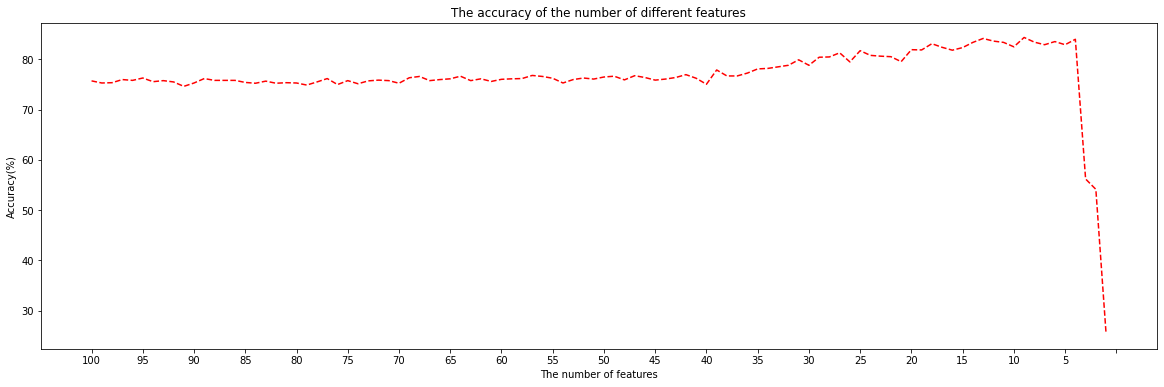

In [59]:
# 用X_train的结果
x_n = [str(100-x) for x in range(100)]
y_acc = [75.70, 75.28, 75.34, 75.96, 75.80, 76.27, 75.54, 75.75, 75.49, 74.61, 75.28, 76.16, 75.80, 75.80, 75.80, 75.39, 75.23, 75.65, 75.23, 75.34, 75.28, 74.87, 75.49, 76.16, 74.97, 75.75, 75.13, 75.70, 75.85, 75.75, 75.23, 76.32, 76.58, 75.75, 75.96, 76.11, 76.63, 75.75, 76.11, 75.59, 76.01, 76.11, 76.16, 76.78, 76.58, 76.22, 75.28, 75.96, 76.27, 76.06, 76.47, 76.63, 75.90, 76.73, 76.37, 75.85, 76.06, 76.37, 76.94, 76.22, 75.03, 77.87, 76.68, 76.68, 77.25, 78.08, 78.18, 78.49, 78.80, 79.89, 78.80, 80.40, 80.46, 81.28, 79.47, 81.70, 80.77, 80.61, 80.51, 79.52, 81.90, 81.85, 83.09, 82.37, 81.80, 82.32, 83.35, 84.13, 83.61, 83.35, 82.47, 84.33, 83.40, 82.89, 83.51, 82.89, 83.97, 56.20, 54.14, 25.39]
plt.figure(figsize=(20, 6))
plt.plot(x_n,y_acc,'r--',label='xgboost')
plt.title('The accuracy of the number of different features')
plt.xlabel('The number of features')
plt.ylabel('Accuracy(%)')
plt.xticks(np.arange(100,-5,-5))
plt.show()